In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Make data

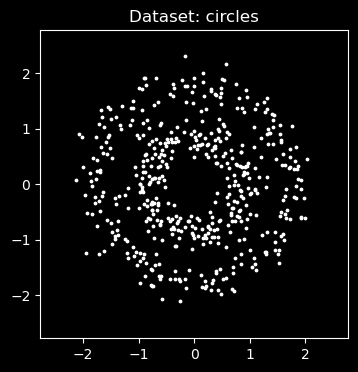

In [29]:
from sklearn.datasets import make_blobs, make_classification, make_moons, make_circles

dataset_type = 'circles'  # try: blobs, classification, moons, circles, anisotropic, varied

if dataset_type == 'blobs':
    X1, _ = make_blobs(
        n_samples=500,
        centers=3,
        cluster_std=3,
        random_state=42
    )

elif dataset_type == 'classification':
    X1, _ = make_classification(
        n_samples=120,
        n_features=2,
        n_redundant=0,
        n_clusters_per_class=1,
        n_classes=3,
        class_sep=2,
        random_state=42
    )

elif dataset_type == 'moons':
    from sklearn.datasets import make_moons
    X1, _ = make_moons(
        n_samples=400,
        noise=0.1,
        random_state=42
    )

elif dataset_type == 'circles':
    from sklearn.datasets import make_circles
    X1, _ = make_circles(
        n_samples=500,
        noise=0.1,
        factor=0.5,
        random_state=42
    )

elif dataset_type == 'anisotropic':
    X1, _ = make_blobs(
        n_samples=120,
        centers=3,
        cluster_std=1,
        random_state=42
    )
    # Apply an anisotropic linear transformation
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    X1 = X1.dot(transformation)

elif dataset_type == 'varied':
    X1, _ = make_blobs(
        n_samples=120,
        centers=[[-5, -5], [0, 0], [5, 5]],
        cluster_std=[1.0, 2.5, 0.5],
        random_state=42
    )

else:
    raise ValueError("Unknown dataset_type")

# Normalize and add optional noise
n_noise = 0
X1 -= np.mean(X1, axis=0)
MAX = np.max(np.abs(X1))
X2 = np.random.uniform(-MAX, MAX, size=(n_noise, 2))

X = np.concatenate((X1, X2), axis=0)
X -= np.mean(X, axis=0)
X /= np.std(X)
MAX = np.max(np.abs(X)) * 1.2

# Plot
%matplotlib inline

plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c='w', s=3)
plt.xlim(-MAX, MAX)
plt.ylim(-MAX, MAX)
plt.gca().set_aspect('equal')
plt.title(f"Dataset: {dataset_type}")
plt.show()

# Perform DBSCAN w/ sklearn

Like agglomerative, you can't generalize the model to new data.

,-1,0,1
count,43,440,17


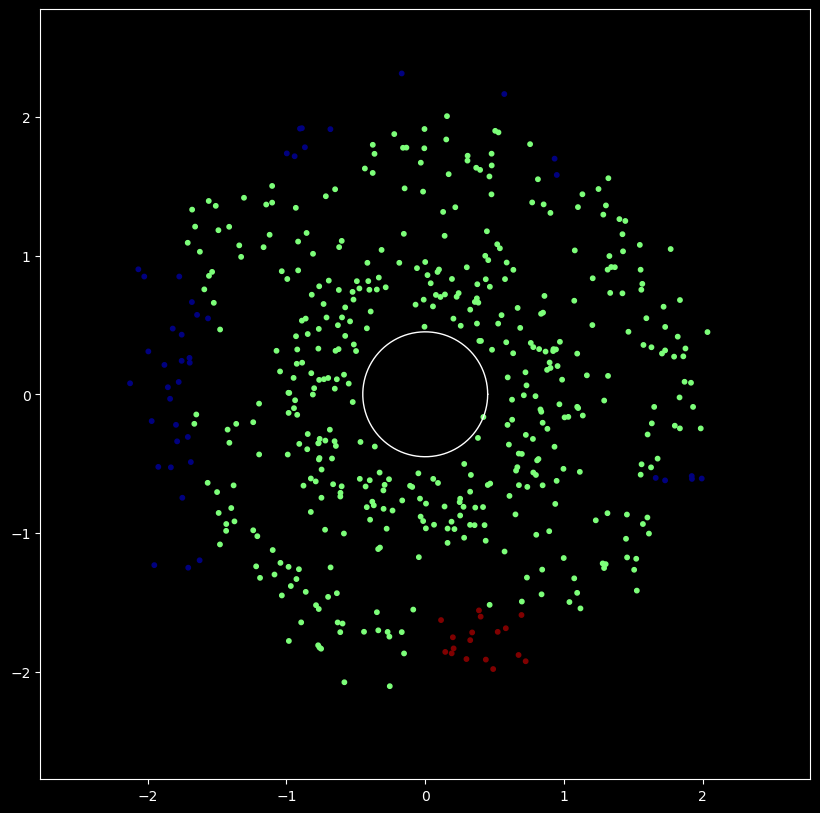

In [31]:
from sklearn.cluster import DBSCAN

radius      = 0.45
min_samples = 20

# Find clusters
model = DBSCAN(
    eps=radius,
    min_samples=min_samples
)
labels = model.fit_predict(X)

display(pd.DataFrame(pd.Series(labels).value_counts().sort_index()).T)

# Plot
cmap = 'jet'

plt.figure(figsize=(10,10))

theta = np.linspace(0,2*np.pi,100)
c = radius * np.cos(theta)
s = radius * np.sin(theta)

plt.plot(c, s, linewidth=1, c='w')

plt.scatter(X[:,0], X[:,1], c=labels, s=10, cmap=cmap);
plt.xlim(-MAX,MAX)
plt.ylim(-MAX,MAX)
plt.gca().set_aspect('equal')
plt.show()

# Varying the radius

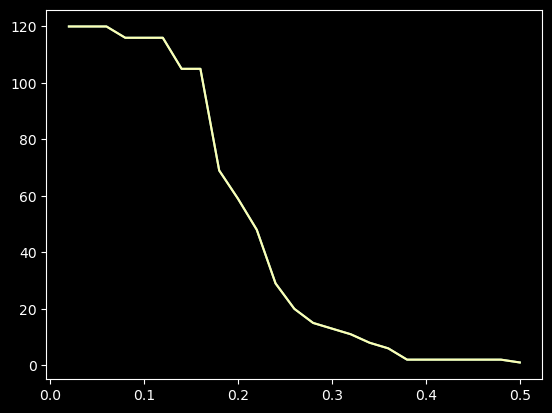

In [25]:
radii = 0.02 * (np.arange(25)+1)

n_clusters = []

for r in radii:
    model = DBSCAN(eps=r, min_samples=5)
    labels = model.fit_predict(X)
    labels = pd.Series(labels)
    
    vc = labels.value_counts()
    try:
        n_clusters.append( vc.shape[0] - 1 + vc[-1] )
    except:
        n_clusters.append( vc.shape[0] )
    # end
# end

plt.plot( radii, n_clusters )
plt.show()

# Finding the ideal epsilon radius

### manually

In [36]:
from sklearn.neighbors import NearestNeighbors

n_neighbors = int(X.shape[0]*0.1)
#n_neighbors = 3
model_neigh = NearestNeighbors(n_neighbors=n_neighbors)
model_neigh.fit(X)

distances, indices = model_neigh.kneighbors(X,
                                            n_neighbors=n_neighbors,
                                            return_distance=True)

# Compute the median distance to the k-nearest neighbors
radius = np.median(distances[:, -1])
radius

0.6399728165287992

### using estimate bandwidth

In [32]:
from sklearn.cluster import estimate_bandwidth

radius = estimate_bandwidth(X, quantile=0.1)
radius

0.7188068796947541

### test

0    500
Name: count, dtype: int64


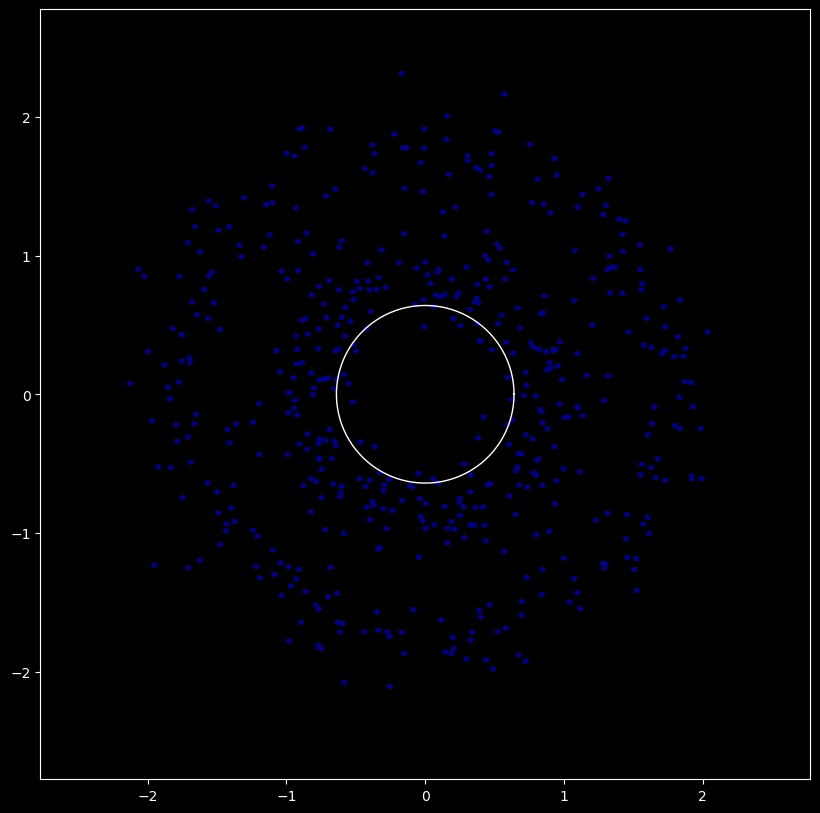

In [37]:
from sklearn.cluster import DBSCAN

# Find clusters
model = DBSCAN(eps=radius, min_samples=5)
labels = model.fit_predict(X)

print(pd.Series(labels).value_counts().sort_index())

# Plot
plt.figure(figsize=(10,10))

theta = np.linspace(0,2*np.pi,100)
c = radius * np.cos(theta)
s = radius * np.sin(theta)

plt.plot(c, s, linewidth=1, c='w')

plt.scatter(X[:,0], X[:,1], c=labels, s=10, cmap=cmap);
plt.xlim(-MAX,MAX)
plt.ylim(-MAX,MAX)
plt.gca().set_aspect('equal')
plt.show()